## P-value

<img src="d.JPG">

<img src="e.JPG">

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
df = pd.read_csv('coffee_dataset.csv')

$$H_0: \mu\leq 70$$


$$H_1: \mu\  > 70$$   

In [3]:
sample_df = df.sample(150)

In [4]:
bootsample = sample_df.sample(150,replace=True)
mean = []
for _ in range(10000):
    bootsample = sample_df.sample(150,replace=True)
    mean.append(bootsample.height.mean())

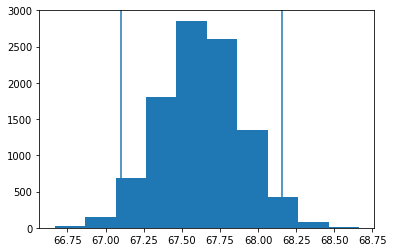

In [5]:
low,upper = np.percentile(mean,2.5),np.percentile(mean,97.5)
plt.hist(mean);
plt.axvline(x=low)
plt.axvline(x=upper)
plt.show()

In [6]:
np.std(mean)

0.26582463905559006

 #### Null distribution with 150 sample mean axis 

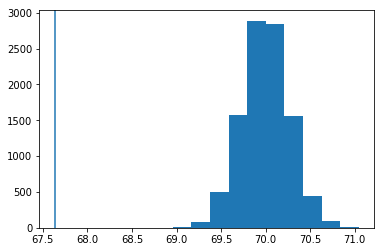

In [7]:
null_vals =  np.random.normal(70,np.std(mean),10000)
plt.hist(null_vals) 
plt.axvline(x=sample_df.height.mean())   # mean of height-sample 
plt.show()

**Calcualting P-value**

In [8]:
sample_df.height.mean()
#That is smaller than 70. Since the sample mean is 67.63 it makes sense that we wouldn't decide an H_1

67.63297688228066

In [9]:
(null_vals > mean).mean()    
#right side 
#Comparison between null distribution and sample mean we can find p-value equal to 1 
#Remember, large p-value suggests that we shouldn't move away from the null hypothesis. 
# In this case, we should stay with the mean being less than 70 

1.0

**Now we changed the inequality**

$$H_0: \mu\geq 70$$


$$H_1: \mu\  < 70$$   

In [11]:
(null_vals < mean).mean()   
# left side 
# because sample mean is 67.63 and samller than 70 we can take alternative hypothese 
# Truly we got p-value equal zero which is smaller than 5%
# In the end we can say that is statistically significant 

0.0

**two side of hypotheses testing**

$$H_0: \mu\ = 70$$


$$H_1: \mu\neq 70$$   

In [18]:
(null_vals < sample_df.height.mean()).mean() + (null_vals > 70 + (70 - sample_df.height.mean())).mean()
# left p-value                                                          # right p-value 

0.0

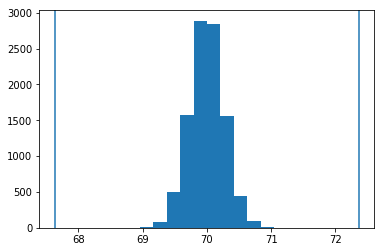

In [17]:
low = sample_df.height.mean()
upper = 70 + (70 - sample_df.height.mean()) 
plt.hist(null_vals)
plt.axvline(x=low)
plt.axvline(x=upper)
plt.show()


#You can see that if we were to shade more extreme than either of these regions 
#there are essentially no data points from our null hypothesis that fall outside of this region.
#Again we would have evidence to suggest that the null hypothesized value didn't generate our sample statistic 